In [81]:
import h5py as h5;
import numpy as np;
import matplotlib.pyplot as plt;

In [90]:
file_prefix = '/data/data_challenge_1b/Data_Challenge_1b_I1_D20200601_T161750_F00'
dump_num = '21'
filename = file_prefix + dump_num + '.hdf5'

file = h5.File( filename )

In [91]:
print('Keys:')
print( list( file.attrs.keys() ) )

print('Keys under adc1:')
print( list( file['adc1'].attrs.keys() ) )

nb_samples = file['adc1'].attrs['nb_samples']
nb_events = file['adc1'].attrs['nb_events']

print( nb_events)
print( nb_samples)

Keys:
['comment', 'daq_version', 'dump_num', 'facility', 'format_version', 'run_type', 'series_num', 'timestamp']
Keys under adc1:
['adc_channel_indices', 'adc_connections', 'adc_conversion_factor', 'adc_name', 'data_mode', 'nb_channels', 'nb_events', 'nb_samples', 'sample_rate', 'voltage_range']
300
1250000


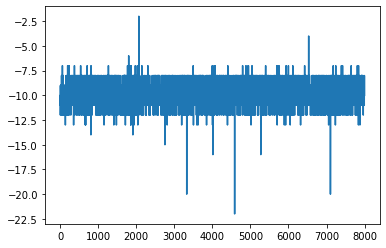

In [93]:
ch_index = 3
evt_index = 10


event_name = 'event_%d' % evt_index
event1 = file['adc1'][event_name][ch_index][nb_samples-4000:]

evt_index += 1
event_name = 'event_%d' % evt_index
event2 = file['adc1'][event_name][ch_index][:4000]

event = np.append( event1, event2)

plt.plot( event )

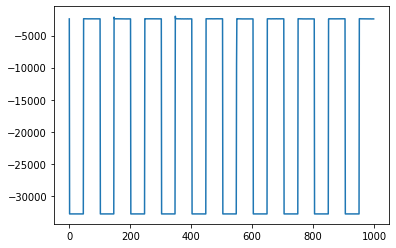

In [135]:
chan_index = 1

event_name = 'event_%d' % evt_index
event = -f[event_name][chan_index][0:1000]
plt.plot(event)

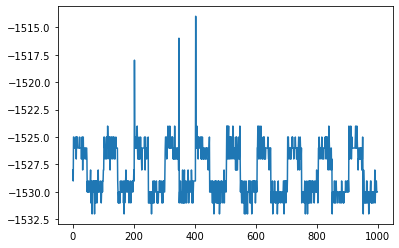

In [126]:
chan_index = 2

event_name = 'event_%d' % evt_index
event = f[event_name][chan_index][0:1000]
plt.plot(event)

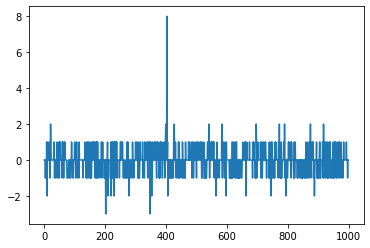

In [127]:
chan_index = 3

event_name = 'event_%d' % evt_index
event = f[event_name][chan_index][0:1000]
plt.plot(event)